In [1]:
using Robotics
using LinearAlgebra
using Plots
using Images
pyplot()

┌ Info: Precompiling Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace].
└ @ Base loading.jl:1017


Plots.PyPlotBackend()

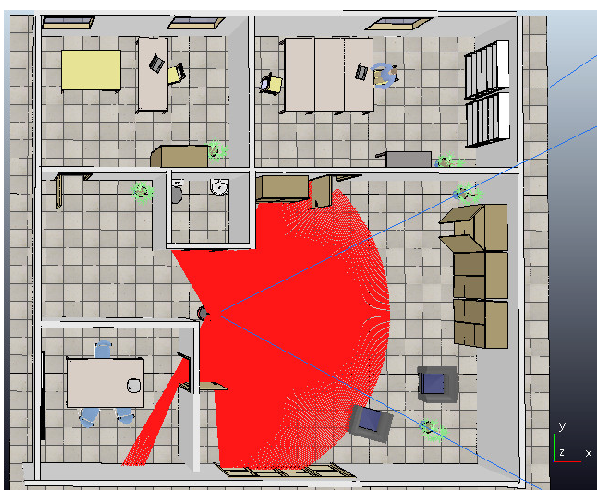

In [2]:
scene_img = load("scene_laser.jpg")

plot(scene_img, size=(600, 500),
    ticks=nothing, border=:none)

In [3]:
reset_simulation()

robot = Robot()

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.


Robot(0, Int32[328, 327, 326, 325, 324, 323, 322, 321, 336, 335, 334, 333, 332, 331, 330, 329], 348, 355, Dict(:left => 311,:right => 308), 307, 0.381f0, 0.0975f0)

In [4]:
sonar_data = read_sonar(robot)

@show(sonar_data)
println(length(sonar_data))

sonar_data = Float32[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.5883149, 0.4595236, 0.445536, 5.0, 5.0, 5.0, 5.0]
16


In [5]:
laser_data = read_laser(robot)

@show(laser_data[1:10])
println(length(laser_data))

laser_data[1:10] = Float32[-2.4147897, -4.182538, 0.06300014, -2.3826277, -4.185997, 0.06300014, -2.3510635, -4.1901984, 0.063000135, -2.3107057]
1239


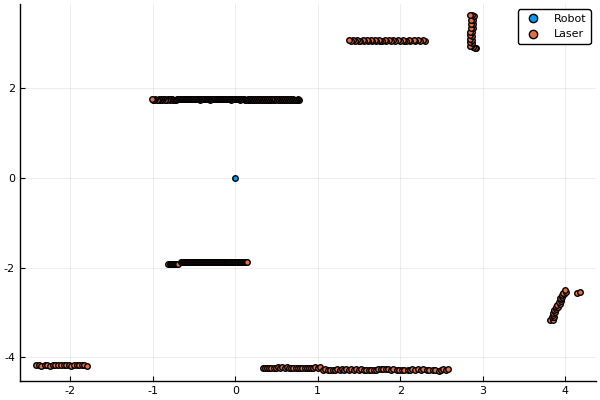

In [6]:
indices_X = 1:3:length(laser_data)
indices_Y = 2:3:length(laser_data)

laser_X = laser_data[indices_X]
laser_Y = laser_data[indices_Y]

scatter([0], [0], label="Robot")
scatter!(laser_X, laser_Y, label="Laser")

In [7]:
x, y, θ = pose2D(robot)

(-2.0255475f0, -0.82499295f0, -4.6250687f-5)

In [8]:
T = T_r2g(x, y, θ)

3×3 Array{Float64,2}:
  1.0         4.62507e-5  -2.02555 
 -4.62507e-5  1.0         -0.824993
  0.0         0.0          1.0     

In [9]:
D1 = ones(eltype(laser_data), length(laser_data)÷3)

L = hcat(laser_X, laser_Y, D1)'

L

3×413 Adjoint{Float32,Array{Float32,2}}:
 -2.41479  -2.38263  -2.35106  -2.31071  …  -0.983599  -0.996844  -1.01429
 -4.18254  -4.186    -4.1902   -4.1782       1.75304    1.75135    1.75681
  1.0       1.0       1.0       1.0          1.0        1.0        1.0    

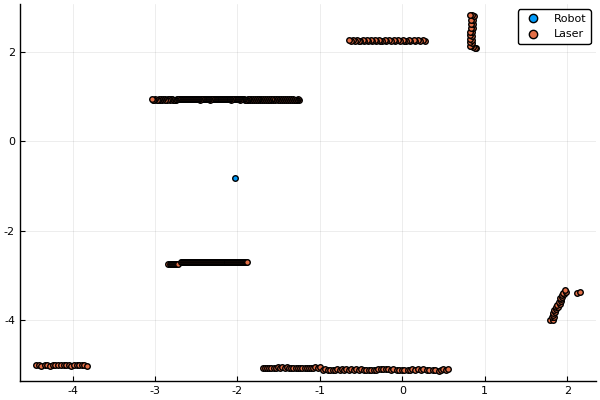

In [10]:
Lg = T * L

laser_Xg = Lg[1, :]
laser_Yg = Lg[2, :]

scatter([x], [y], label="Robot")
scatter!(laser_Xg, laser_Yg, label="Laser")

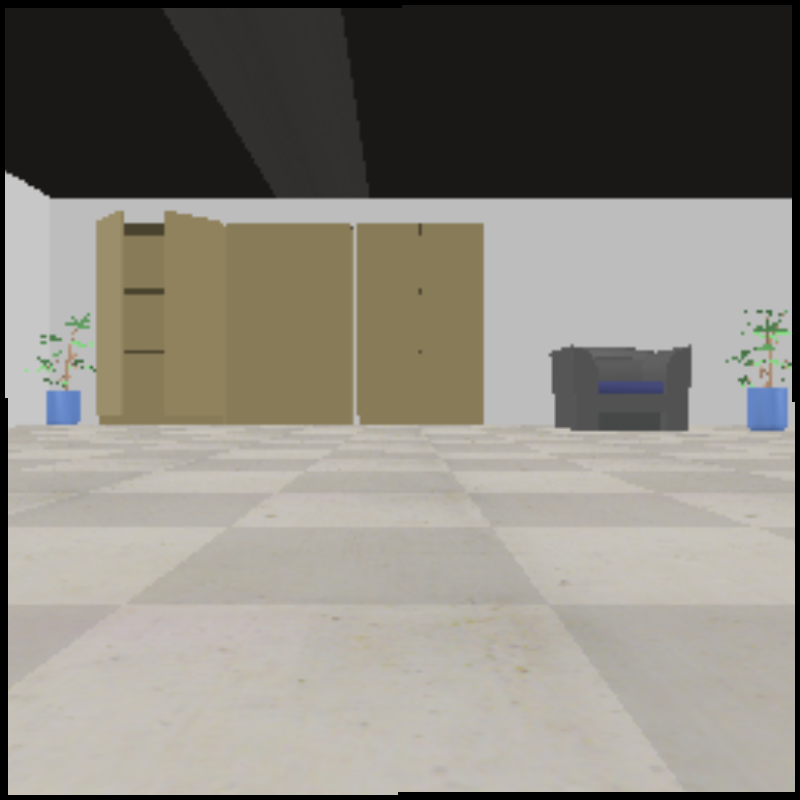

In [11]:
show_vision(robot)

**Simulation Tuning**

Custom settings.

* Time step = 250ms
* Real-time simulation enabled (w/ 'try catching up')

This settings work better to sync theoretical time and simulation time.

In [12]:
R = Robotics.WHEEL_RADIUS

0.0975f0

In [13]:
L = Robotics.ROBOT_WIDTH / 2

0.1905f0

...

*Translation Analysis*

Evaluate the fidelity of the simulation related to expected results from kinematic model.

The case is to move the robot in a straight line for 5 meters in the expected time.

In [14]:
s = 5.0 # meters
ω = 1.0 # rads per second

T = s / (ω * R) # seconds

T

51.28205316306578

In [15]:
release(robot)
reset_simulation()

robot = Robot()

a = get_current_position(robot)
t0 = time()

set_right_velocity(robot, ω)
set_left_velocity(robot, ω)
sleep(T)

t1 = time()

b = get_current_position(robot)
D = norm(a - b)

stop(robot)
sleep(0.5)

c = get_current_position(robot)
D_ = norm(b - c)

println("Position Initial  : ", a)
println("Position Final    : ", b)
println("Position Stop     : ", c)
println("Distance Expected : ", s)
println("Distance Actual   : ", D + D_)
println("Distance Move     : ", D)
println("Distance Stop     : ", D_)
println("Time Expected     : ", T)
println("Time Actual       : ", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.
Position Initial  : Float32[-2.0253842, -0.82499, 0.13867836]
Position Final    : Float32[2.9428155, -0.82641506, 0.13869953]
Position Stop   

In [16]:
release(robot)
reset_simulation()

robot = Robot()

a = get_current_position(robot)
t0 = time()

set_right_velocity(robot, ω)
set_left_velocity(robot, ω)

b = Vector{Float32}(undef, 0)
D = Float32(0)
while true
    sleep(0.5)
    b = get_current_position(robot)
    D = norm(a - b)
    if D ≈ s || D > s
        break
    end
end

t1 = time()

stop(robot)
sleep(0.5)

c = get_current_position(robot)
D_ = norm(b - c)

println("Position Initial  : ", a)
println("Position Final    : ", b)
println("Position Stop     : ", c)
println("Distance Expected : ", s)
println("Distance Actual   : ", D + D_)
println("Distance Move     : ", D)
println("Distance Stop     : ", D_)
println("Time Expected     : ", T)
println("Time Actual       : ", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.
Position Initial  : Float32[-2.0253842, -0.82499, 0.13867836]
Position Final    : Float32[2.991538, -0.82642066, 0.13868943]
Position Stop    

...

*Rotation Analysis*

Evaluate the fidelity of the simulation related to expected results from kinematic model.

The case is to turn the robot by 90° in the expected time.

In [17]:
rot = 90 * π / 180 # rads
ω = 0.1 # rads per second

T = (rot * L) / (ω * R) # seconds

T

30.690945721055847

In [18]:
release(robot)
reset_simulation()

robot = Robot()

a = get_current_orientation(robot)[3]
t0 = time()

set_right_velocity(robot, ω)
set_left_velocity(robot, -ω)
sleep(T)

t1 = time()

stop(robot)
sleep(0.5)

b = get_current_orientation(robot)[3]
D = a >= 0 && b < 0 ? 2 * π + b - a : abs(b - a)

println("Gamma Initial : ", a)
println("Gamma Final   : ", b)
println("Rot Expected  : ", rot)
println("Rot Actual    : ", D)
println("Time Expected : ", T)
println("Time Actual   : ", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.
Gamma Initial : -5.4010354e-5
Gamma Final   : 1.7847878
Rot Expected  : 1.5707963267948966
Rot Actual    : 1.7848418
Time Expected : 30.690945

In [19]:
release(robot)
reset_simulation()

robot = Robot()

a = get_current_orientation(robot)[3]
t0 = time()

set_right_velocity(robot, ω)
set_left_velocity(robot, -ω)

b = Float32(0)
D = Float32(0)
while true
    b = get_current_orientation(robot)[3]
    D = a >= 0 && b < 0 ? 2 * π + b - a : abs(b - a)
    if D ≈ rot || D > rot
        break
    end
end

t1 = time()

stop(robot)
sleep(0.5)

println("Gamma Initial : ", a)
println("Gamma Final   : ", b)
println("Rot Expected  : ", rot)
println("Rot Actual    : ", D)
println("Time Expected : ", T)
println("Time Actual   : ", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.
Gamma Initial : -5.4010354e-5
Gamma Final   : 1.581896
Rot Expected  : 1.5707963267948966
Rot Actual    : 1.58195
Time Expected : 30.690945721

In [20]:
release(robot)